## Ololade Adetula
## Convoluted Neural Networking

In [43]:
# Importing environment supporting tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [44]:
# Fixing Certification Invalid Bug
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [45]:
# Packages implemented 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [57]:
cifar10 = tf.keras.datasets.cifar10 # This is dataset 10 in the keras website used for analysis. 

In [58]:
# creating training and testing sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [59]:
print(train_images.shape) # 50000, 32, 32, 3

(50000, 32, 32, 3)


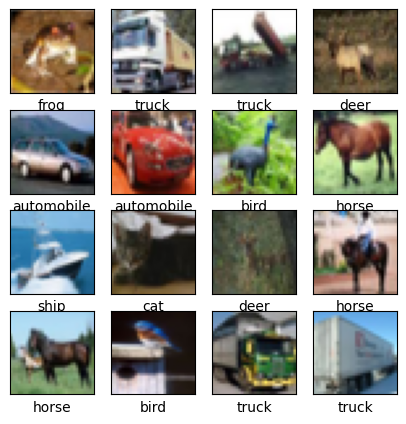

In [60]:
# Data Normalization from: 0,255 -> 0,1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def show():
    plt.figure(figsize=(5,5)) # Smaller fig size bcos cifar picture is very small (32x32)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

show()

In [61]:
# model...
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
print(model.summary())
#import sys; sys.exit()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [37]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [38]:
# training
batch_size = 64
epochs = 5

model.fit(train_images, train_labels, epochs=epochs,
          batch_size=batch_size, verbose=2)


Epoch 1/5
782/782 - 43s - loss: 1.5449 - accuracy: 0.4472 - 43s/epoch - 55ms/step
Epoch 2/5
782/782 - 36s - loss: 1.2326 - accuracy: 0.5652 - 36s/epoch - 46ms/step
Epoch 3/5
782/782 - 36s - loss: 1.1055 - accuracy: 0.6121 - 36s/epoch - 46ms/step
Epoch 4/5
782/782 - 36s - loss: 1.0207 - accuracy: 0.6439 - 36s/epoch - 47ms/step
Epoch 5/5
782/782 - 39s - loss: 0.9625 - accuracy: 0.6644 - 39s/epoch - 50ms/step


In [39]:
# evaulate
model.evaluate(test_images,  test_labels, batch_size=batch_size, verbose=2)

157/157 - 2s - loss: 0.9991 - accuracy: 0.6514 - 2s/epoch - 15ms/step


[0.999076783657074, 0.6514000296592712]